# Librerias

In [147]:
import pandas as pd
import missingno as msno
import numpy as np

In [148]:
videogames = pd.read_csv(r"../data/games.csv")

In [149]:
videogames.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [150]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [151]:
# nombre de columnas
videogames.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [152]:
# Cambiar nombre de columnas
videogames = videogames.rename(
    columns={
        "Name": "name",
        "Rating": "rating_esrb",
        "Genre": "genre",
    }
)

In [153]:
videogames.columns

Index(['name', 'Platform', 'Year_of_Release', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'rating_esrb'],
      dtype='object')

Visualizar valores ausente y valores unicos

In [154]:
# Visualizar valores unicos
valores_unicos = videogames.nunique()

In [155]:
# Cuantos valores ausentes 
valores_ausentes = videogames.isnull().sum()

In [156]:
videogames.columns

Index(['name', 'Platform', 'Year_of_Release', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'rating_esrb'],
      dtype='object')

In [157]:
type(videogames)

pandas.core.frame.DataFrame

In [158]:
videogames.isnull().sum().info()

<class 'pandas.core.series.Series'>
Index: 11 entries, name to rating_esrb
Series name: None
Non-Null Count  Dtype
--------------  -----
11 non-null     int64
dtypes: int64(1)
memory usage: 176.0+ bytes


In [159]:
# Suma de Nulos que estan en la columna rating_esrb
videogames.isnull().sum()["rating_esrb"]

np.int64(6766)

In [160]:
tota_datos = len(videogames)

In [161]:
# Convertir un tipo de dato a otro
datos_generales = pd.DataFrame({
    "Valores unicos": valores_unicos,
    "Nulos": valores_ausentes
})
datos_generales

,Valores unicos,Nulos
name,11559,2
Platform,31,0
Year_of_Release,37,269
genre,12,2
NA_sales,402,0
EU_sales,307,0
JP_sales,244,0
Other_sales,155,0
Critic_Score,82,8578
User_Score,96,6701


In [162]:
# Porcentaje de ausentes en todas las columnas con formateados round
round(videogames.isnull().mean() * 100 , 1)

name                0.0
Platform            0.0
Year_of_Release     1.6
genre               0.0
NA_sales            0.0
EU_sales            0.0
JP_sales            0.0
Other_sales         0.0
Critic_Score       51.3
User_Score         40.1
rating_esrb        40.5
dtype: float64

Cantidad de valores no nulos (grafico)

<Axes: >

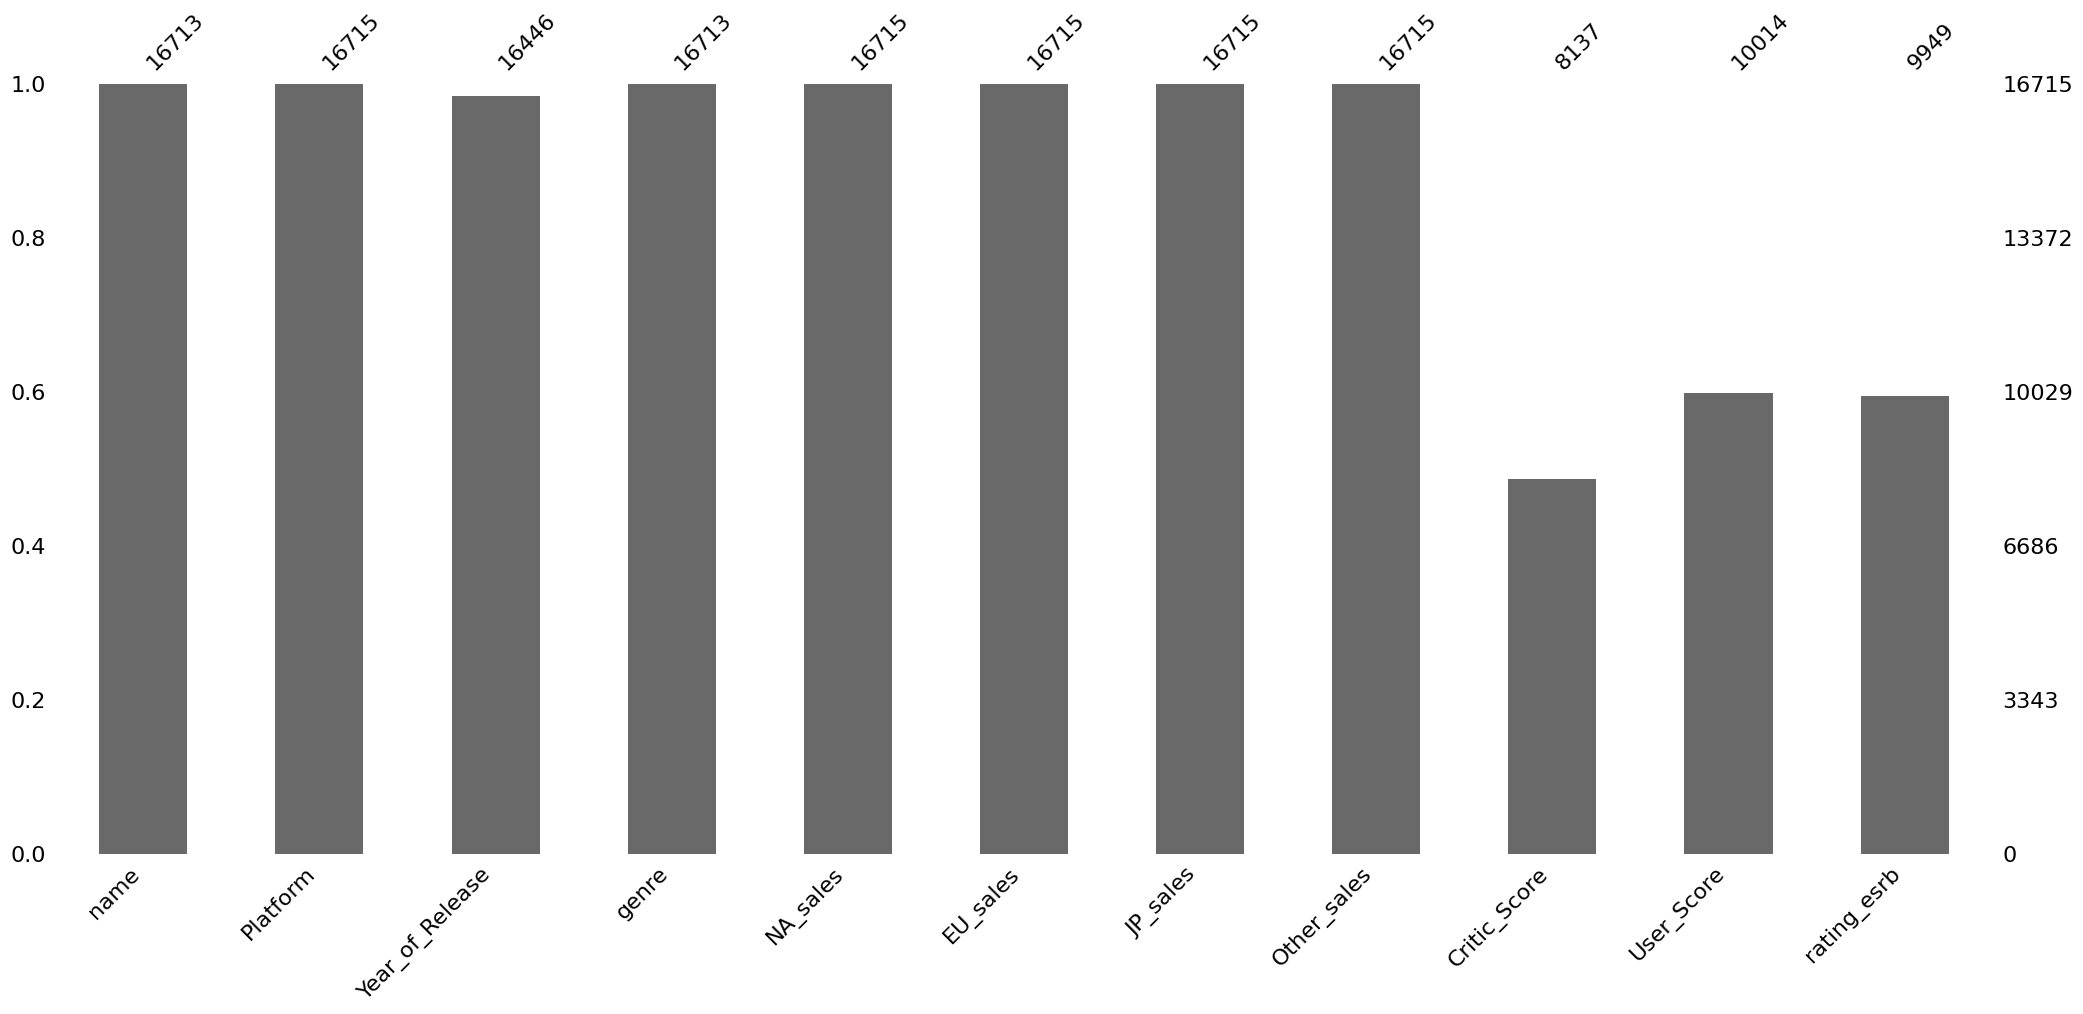

In [163]:
# Crear distintos graficos para visualizar mejor forma los datos
msno.bar(videogames)

Matriz de valores ausentes

<Axes: >

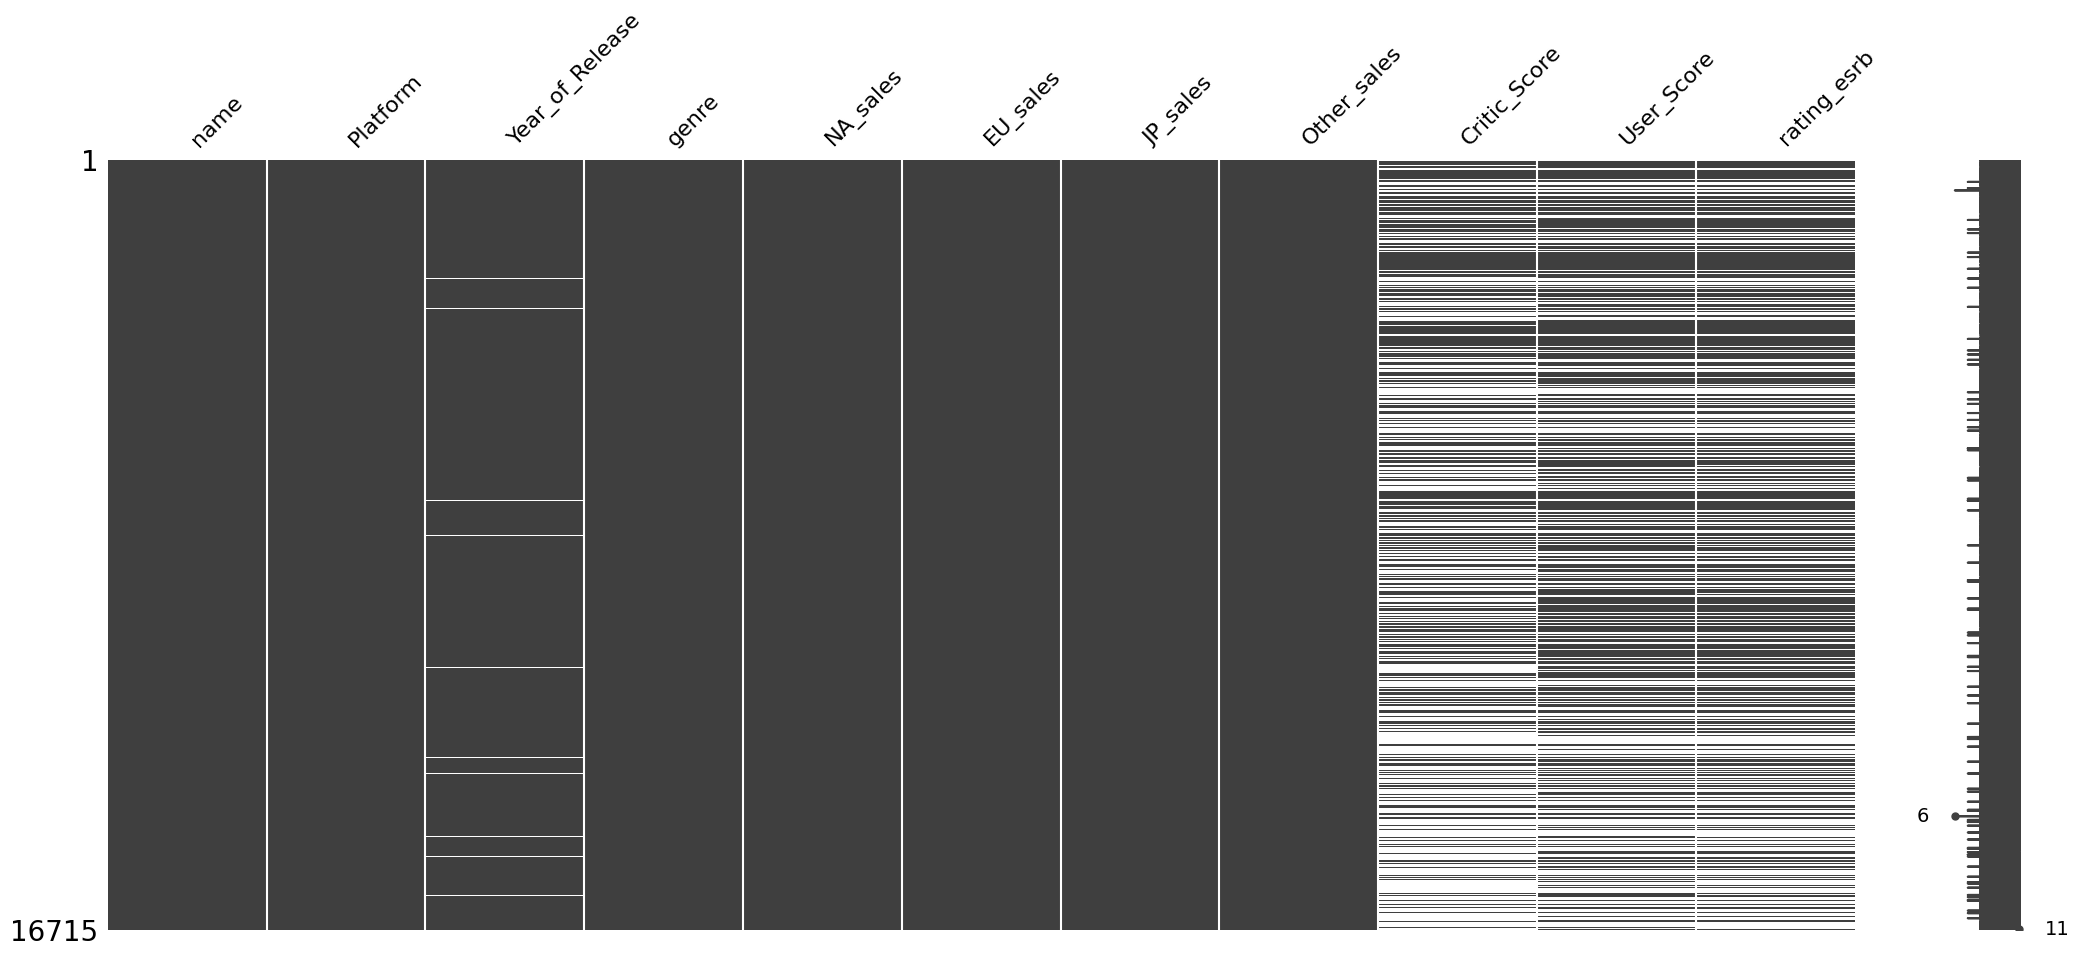

In [164]:
# Matriz de valores ausentes 
msno.matrix(videogames)

La librería `missingno` se concentra en visualizar y analizar datos en valores ausentes

## HEATMAP

Este es un mapa de calor, que indica valores ausentes.

Por ejemplo genre vs name, nos indica que hay valores ausentes en dos filas

User Score vs Critic Store tiene 0.8, es decir en casi todas hay datos ausentes y quiere decir que donde es ausente en User Score tambien es ausente en Critic Store

<Axes: >

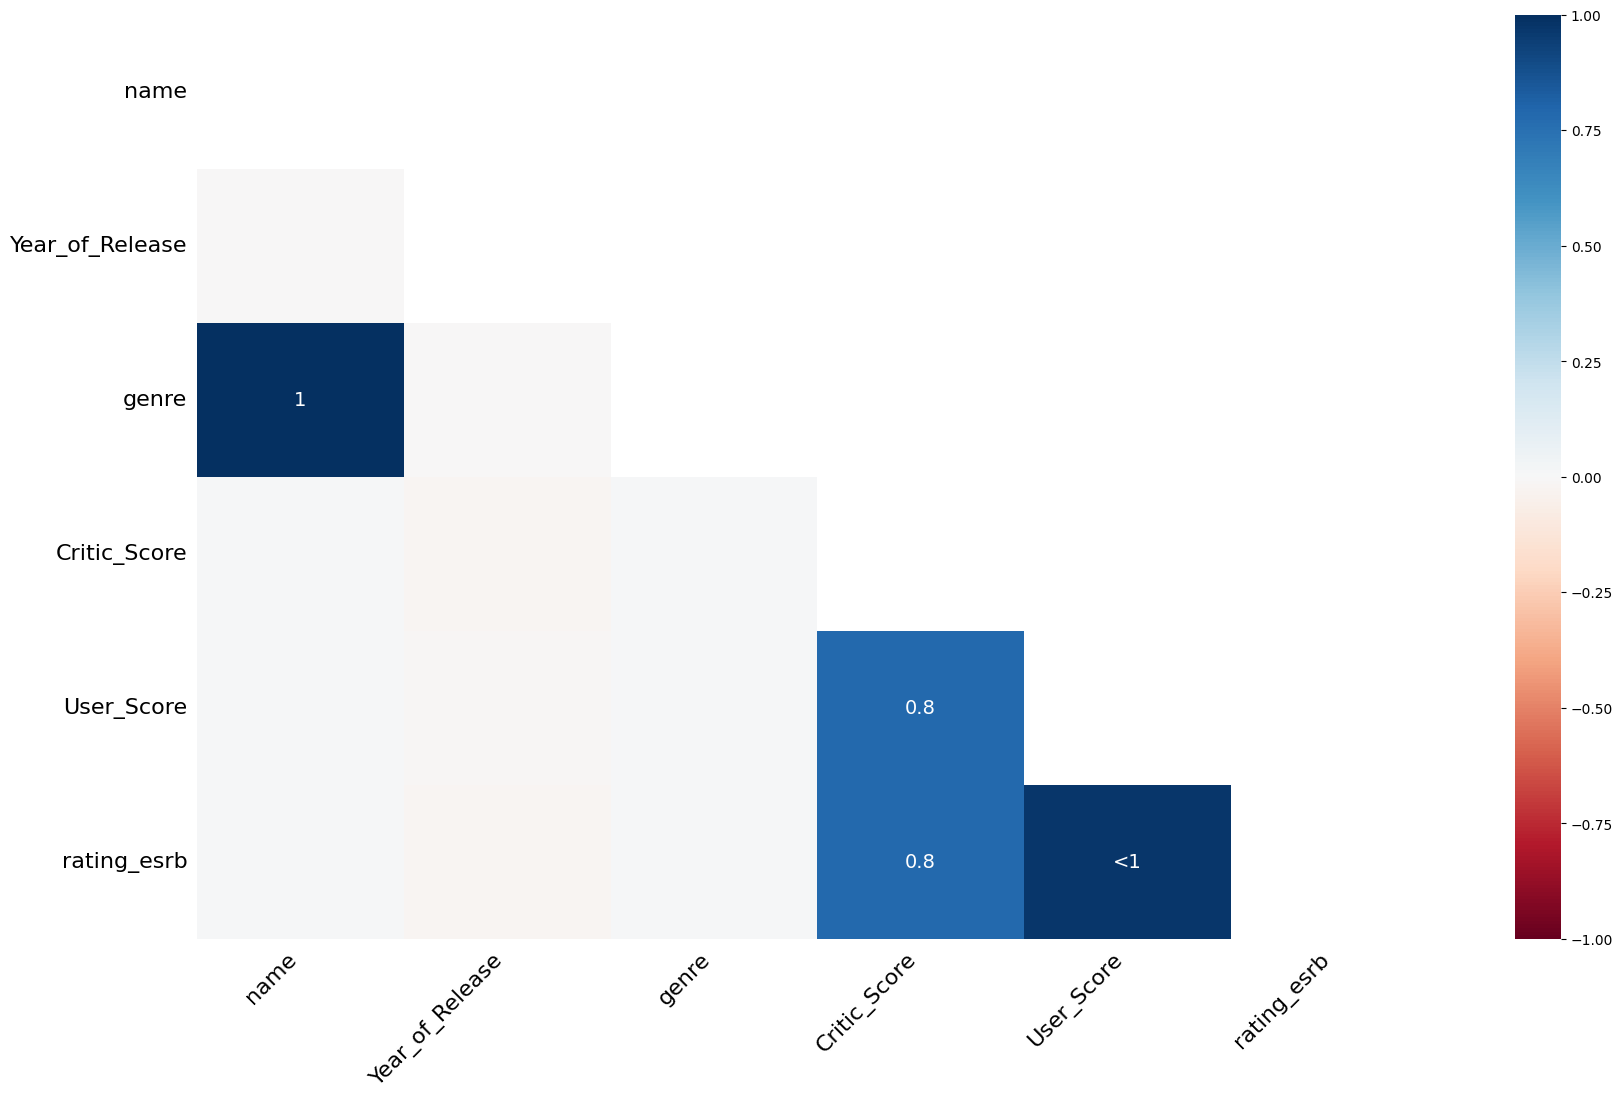

In [165]:
msno.heatmap(videogames)

## Analizar de forma rápida los datos por columnas

Conteo total de datos categoricos numericos continuos.  

*Frecuencia o distribución de los datos*

In [166]:
videogames["genre"].value_counts(normalize=True) * 100 

genre
Action          20.157961
Sports          14.048944
Misc            10.470891
Role-Playing     8.963083
Shooter          7.915994
Adventure        7.796326
Racing           7.473224
Platform         5.313229
Simulation       5.223479
Fighting         5.079878
Strategy         4.086639
Puzzle           3.470352
Name: proportion, dtype: float64

Aqui podemos ver si hay columnas iguales pero case sensitive diferente ej: "Sports" y "sports"

## Automatización del código

In [167]:
videogames.columns

Index(['name', 'Platform', 'Year_of_Release', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'rating_esrb'],
      dtype='object')

In [168]:
for column in videogames.columns:
    print(f"------- {column} --------")
    p = videogames[column].value_counts(normalize=True, dropna=False) * 100 
    print(p)
    print()
    
    # NAN -> valores ausentes 

------- name --------
name
Need for Speed: Most Wanted    0.071792
Madden NFL 07                  0.053844
FIFA 14                        0.053844
LEGO Marvel Super Heroes       0.053844
Ratatouille                    0.053844
                                 ...   
New Super Mario Bros. Wii      0.005983
Wii Play                       0.005983
New Super Mario Bros.          0.005983
Pokemon Red/Pokemon Blue       0.005983
Wii Sports Resort              0.005983
Name: proportion, Length: 11560, dtype: float64

------- Platform --------
Platform
PS2     12.928507
DS      12.868681
PS3      7.962908
Wii      7.897098
X360     7.550105
PSP      7.233024
PS       7.161232
PC       5.827101
XB       4.929704
GBA      4.917739
GC       3.326354
3DS      3.110978
PSV      2.572540
PS4      2.345199
N64      1.908465
XOne     1.477715
SNES     1.429853
SAT      1.034999
WiiU     0.879450
2600     0.795692
NES      0.586300
GB       0.586300
DC       0.311098
GEN      0.173497
NG       0.071792

Ver tipos de datos

In [169]:
videogames.dtypes

# tbd -> no determinado

name                object
Platform            object
Year_of_Release    float64
genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
rating_esrb         object
dtype: object

## ResetIndex

Ordenar los resuntados por una columna diferente a la del valor de porcentaje

reset_index() -> rerita el indice a la columna por defecto y crea una nueva danto la secuencia de 0 en adelante. 

sort_values() -> determina la columna por la que se ordenará

In [170]:
df = (videogames["genre"].value_counts(normalize=True)*100).reset_index().sort_values(by="genre", ascending=False)
df

,genre,proportion
10,Strategy,4.086639
1,Sports,14.048944
8,Simulation,5.223479
4,Shooter,7.915994
3,Role-Playing,8.963083
6,Racing,7.473224
11,Puzzle,3.470352
7,Platform,5.313229
2,Misc,10.470891
9,Fighting,5.079878


## Resumen estadistico .describe()

Sobre las columnas numericas

- count -> total
- mean-> promedio
- std -> desviación estándar
- min -> valor minimo 
- max -> valor maximo

In [171]:
videogames.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Estadistica de los objetos => strings

In [172]:
categorical_data = videogames.select_dtypes(include="object")
categorical_data.describe()

,name,Platform,genre,User_Score,rating_esrb
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [173]:
numerical_data = videogames.select_dtypes(include="float64")
numerical_data

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
0,2006.0,41.36,28.96,3.77,8.45,76.0
1,1985.0,29.08,3.58,6.81,0.77,NaN
2,2008.0,15.68,12.76,3.79,3.29,82.0
3,2009.0,15.61,10.93,3.28,2.95,80.0
4,1996.0,11.27,8.89,10.22,1.00,NaN
...,...,...,...,...,...,...
16710,2016.0,0.00,0.00,0.01,0.00,NaN
16711,2006.0,0.00,0.01,0.00,0.00,NaN
16712,2016.0,0.00,0.00,0.01,0.00,NaN
16713,2003.0,0.01,0.00,0.00,0.00,NaN


Cambiar el tipo de dato a una columna

In [174]:
videogames.columns

Index(['name', 'Platform', 'Year_of_Release', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'rating_esrb'],
      dtype='object')

In [175]:
videogames["Year_of_Release"] = videogames["Year_of_Release"].astype("Int64")
videogames.dtypes

name                object
Platform            object
Year_of_Release      Int64
genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
rating_esrb         object
dtype: object

In [176]:
numerical_data = videogames.select_dtypes(include=["float64", "Int64"])
numerical_data

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
0,2006,41.36,28.96,3.77,8.45,76.0
1,1985,29.08,3.58,6.81,0.77,NaN
2,2008,15.68,12.76,3.79,3.29,82.0
3,2009,15.61,10.93,3.28,2.95,80.0
4,1996,11.27,8.89,10.22,1.00,NaN
...,...,...,...,...,...,...
16710,2016,0.00,0.00,0.01,0.00,NaN
16711,2006,0.00,0.01,0.00,0.00,NaN
16712,2016,0.00,0.00,0.01,0.00,NaN
16713,2003,0.01,0.00,0.00,0.00,NaN


## Limpiando la columna user_score

In [177]:
videogames["User_Score"].value_counts(dropna=False)
# tbd -> NAN not a number -> vacio -> no existe

User_Score
NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 97, dtype: int64

In [178]:
# Reemplazar valores de columnas especificamente tbd o nan
videogames["User_Score"] = videogames["User_Score"].replace("tbd", np.nan)
#np.nan -> es un valor formateado coreectamente como ausente
videogames["User_Score"].value_counts(dropna=False)

User_Score
NaN    9125
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

## Pasar todas las columnas a minusculas

In [179]:
videogames.columns = videogames.columns.str.lower()
videogames.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Limpieza de nombres en la columna videogames

In [180]:
# Eliminar espacio en blanco

videogames.columns = videogames.columns.str.strip()
videogames.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [181]:
# Valores ausentes
videogames.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating_esrb        6766
dtype: int64

In [182]:
videogames.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating_esrb'],
      dtype='object')

In [183]:
videogames[videogames["name"] == "Wii Sports"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [184]:
# varios filtros a la vez
videogames.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Filtrado de datos

In [185]:
wii_sport_games = videogames[(videogames["platform"] == "Wii") & (videogames["genre"] == "Sports")]
wii_sport_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E
86,Mario & Sonic at the Olympic Games,Wii,2007,Sports,2.57,3.86,0.66,0.91,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16044,Turbo: Super Stunt Squad,Wii,2013,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E
16189,Major Dream: Major Wii Nagero! Gyroball!!,Wii,2008,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16316,Family Jockey,Wii,2008,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16361,PDC World Championship Darts 2009,Wii,2009,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN


In [186]:
wii_sport_games = videogames[(videogames["platform"] == "Wii") | (videogames["genre"] == "Sports")]
wii_sport_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
...,...,...,...,...,...,...,...,...,...,...,...
16686,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,NaN,NaN,T
16693,PGA European Tour,N64,2000,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [187]:
# Valores ausentes
videogames.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating_esrb        6766
dtype: int64

In [188]:
# consultar columnas de valores ausentes en columnas dadas
videogames[videogames.name.isna() & videogames.genre.isna() ]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [189]:
# Eliminar las filas con valores ausentes en las columnas seleccionadas
videogames = videogames.dropna(subset=["name", "genre"], how="all").reset_index(drop=True)

In [190]:
videogames

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [191]:
# Valores ausentes
videogames.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating_esrb        6764
dtype: int64

### Limpieza de las columnas forzado

No recomendado cuando hay muchos NaN en las filas y columnas es preferible revisr que columnas deben ser tratadas

In [192]:
# Total Datos
videogames.shape

(16713, 11)

In [193]:
# elimina sin analisis previo todos los valores ausentes
videogames.dropna().shape

(6826, 11)

In [194]:
# Porcentaje de eliminado
(16713-6826)/16713*100

59.15754203314785

### Limpieza para eliminar columnas

In [195]:
vt = videogames.drop(columns=["rating_esrb"])
vt

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN


### Limpieza de valores ausentes en la columna "year_of_release"

In [196]:
videogames.isna().mean() * 100

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         54.586250
rating_esrb        40.471489
dtype: float64

In [197]:
videogames["year_of_release"]

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16708    2016
16709    2006
16710    2016
16711    2003
16712    2016
Name: year_of_release, Length: 16713, dtype: Int64

In [198]:
videogames["name"].value_counts().head(20)

name
Need for Speed: Most Wanted                  12
Madden NFL 07                                 9
Ratatouille                                   9
FIFA 14                                       9
LEGO Marvel Super Heroes                      9
FIFA Soccer 13                                8
LEGO The Hobbit                               8
LEGO Jurassic World                           8
Lego Batman 3: Beyond Gotham                  8
Angry Birds Star Wars                         8
LEGO Star Wars II: The Original Trilogy       8
Cars                                          8
LEGO Harry Potter: Years 5-7                  8
The LEGO Movie Videogame                      8
FIFA 15                                       8
Madden NFL 08                                 8
Monopoly                                      8
Terraria                                      8
Star Wars The Clone Wars: Republic Heroes     7
Surf's Up                                     7
Name: count, dtype: int64

In [199]:
videogames[videogames["name"] == "Need for Speed: Most Wanted"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1997,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3580,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6409,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [200]:
# Filtro valores ausentes en la columna year_of_release
videogames[videogames.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Funcion Group By

In [201]:
# Contar video juegos vs plataforma
videogames.groupby(["name"])["platform"].count()

name
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
                               ..
thinkSMART: Chess for Kids      1
uDraw Studio                    1
uDraw Studio: Instant Artist    2
wwe Smackdown vs. Raw 2006      1
¡Shin Chan Flipa en colores!    1
Name: platform, Length: 11559, dtype: int64

In [202]:
videogames.groupby(["platform","year_of_release"])["year_of_release"].count()

platform  year_of_release
2600      1980                9
          1981               46
          1982               36
          1983               11
          1984                1
                             ..
XB        2008                1
XOne      2013               19
          2014               61
          2015               80
          2016               87
Name: year_of_release, Length: 238, dtype: Int64

In [203]:
# Número de peliculas por genero y plataforma
videogames.groupby(["platform","genre"])["name"].count()

platform  genre       
2600      Action          61
          Adventure        2
          Fighting         2
          Misc             5
          Platform         9
                          ..
XOne      Role-Playing    14
          Shooter         38
          Simulation       4
          Sports          38
          Strategy         3
Name: name, Length: 293, dtype: int64

In [204]:
# Número de peliculas por genero y plataforma
# rp = videogames.groupby(["platform","genre"])["name"].count().reset_index().rename(columns={"name","juegos"})
# rp
videogames

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [205]:
videogames.groupby("name")["year_of_release"].median().head(30)

name
 Beyblade Burst                                2016.0
 Fire Emblem Fates                             2015.0
 Frozen: Olaf's Quest                          2013.0
 Haikyu!! Cross Team Match!                    2016.0
 Tales of Xillia 2                             2012.0
'98 Koshien                                    1998.0
.hack//G.U. Vol.1//Rebirth                     2006.0
.hack//G.U. Vol.2//Reminisce                   2006.0
.hack//G.U. Vol.2//Reminisce (jp sales)        2006.0
.hack//G.U. Vol.3//Redemption                  2007.0
.hack//Infection Part 1                        2002.0
.hack//Link                                    2010.0
.hack//Mutation Part 2                         2002.0
.hack//Outbreak Part 3                         2002.0
.hack//Quarantine Part 4: The Final Chapter    2003.0
.hack: Sekai no Mukou ni + Versus              2012.0
007 Racing                                     2000.0
007: Quantum of Solace                         2008.0
007: The World is not E

## Transform

Una *función lambda* en Python es una función anónima y concisa, definida con la palabra clave lambda, que se utiliza para crear funciones pequeñas de una sola línea. Se diferencian de las funciones normales (def) en que no tienen nombre, no necesitan return y solo pueden contener una única expresión. Son ideales para usar como argumentos de funciones de orden superior como map(), filter() y sorted(). 

In [206]:
# Conteo de años en base a la agrupacion de cada uno de los video juegos
videogames.groupby("name")["year_of_release"].median()

name
 Beyblade Burst                 2016.0
 Fire Emblem Fates              2015.0
 Frozen: Olaf's Quest           2013.0
 Haikyu!! Cross Team Match!     2016.0
 Tales of Xillia 2              2012.0
                                 ...  
thinkSMART: Chess for Kids      2011.0
uDraw Studio                    2010.0
uDraw Studio: Instant Artist    2011.0
wwe Smackdown vs. Raw 2006        <NA>
¡Shin Chan Flipa en colores!    2007.0
Name: year_of_release, Length: 11559, dtype: Float64

In [207]:
# Vamos a rellenar la informacion con valores ausentes
# el fillna rellena el valor ausente con el anterior valor
videogames.groupby("name")["year_of_release"].transform(lambda x: x.fillna(method='ffill'))

C:\Users\sborja\AppData\Local\Temp\ipykernel_2912\2086842796.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  videogames.groupby("name")["year_of_release"].transform(lambda x: x.fillna(method='ffill'))


0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16708    2016
16709    2006
16710    2016
16711    2003
16712    2016
Name: year_of_release, Length: 16713, dtype: Int64

In [208]:
videogames["year_of_release"] = videogames.groupby("name")["year_of_release"].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
)

In [209]:
videogames.isna().count()

name               16713
platform           16713
year_of_release    16713
genre              16713
na_sales           16713
eu_sales           16713
jp_sales           16713
other_sales        16713
critic_score       16713
user_score         16713
rating_esrb        16713
dtype: int64

In [210]:
videogames.dropna(subset=["year_of_release"], how="all")
videogames.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating_esrb        6764
dtype: int64

In [211]:
videogames["rating_esrb"] = videogames["rating_esrb"].fillna("RP")
videogames["rating_esrb"].value_counts(dropna=False)

rating_esrb
RP      6767
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
AO         1
Name: count, dtype: int64

In [212]:
videogames.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating_esrb           0
dtype: int64

### Creando Columnas adicionales

In [213]:
videogames["total_sales"] = videogames["na_sales"] + videogames["eu_sales"] + videogames["jp_sales"] + videogames["other_sales"]

In [214]:
videogames

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01


In [215]:
videogames["platform"].value_counts(dropna=False)

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

#### Para machine learning entre menos catergorias exista es mejor

Se recategoriza las plataformas creando una nueva columna `gen_platform`


In [216]:
def asignar_generacion(plataforma):
    if plataforma in ["NES", "2600", "TG16"]:
        return "3ª Gen"
    elif plataforma in ["SNES", "GEN", "GB", "SCD"]:
        return "4ª Gen"
    elif plataforma in ["PS", "N64", "SAT"]:
        return "5ª Gen"
    elif plataforma in ["PS2", "GC", "XB", "GBA"]:
        return "6ª Gen"
    elif plataforma in ["PS3", "X360", "Wii", "PSP", "DS"]:
        return "7ª Gen"
    elif plataforma in ["PS4", "XOne", "WiiU", "3DS", "PSV"]:
        return "8ª Gen"
    elif plataforma in ["PC"]:
        return "PC"
    else:
        return "Otras/Retro"

In [217]:
videogames["gen_platform"] = videogames["platform"].apply(asignar_generacion)

In [218]:
videogames.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales,gen_platform
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,7ª Gen
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24,3ª Gen
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,7ª Gen
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,7ª Gen
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38,4ª Gen


In [219]:
videogames["gen_platform"].value_counts(dropna=False)

gen_platform
7ª Gen         7273
6ª Gen         4363
8ª Gen         1736
5ª Gen         1689
PC              974
4ª Gen          370
3ª Gen          233
Otras/Retro      75
Name: count, dtype: int64

In [223]:
# Expresamos en porcentaje los valores de cada generacion
videogames["gen_platform"].value_counts(normalize=True) * 100

gen_platform
7ª Gen         43.517023
6ª Gen         26.105427
8ª Gen         10.387124
5ª Gen         10.105906
PC              5.827799
4ª Gen          2.213846
3ª Gen          1.394124
Otras/Retro     0.448752
Name: proportion, dtype: float64

### User Score Clasificacion

In [225]:
# Convertir como flotante
videogames["user_score"] = videogames["user_score"].astype("float64") 

In [226]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating_esrb      16713 non-null  object 
 11  total_sales      16713 non-null  float64
 12  gen_platform     16713 non-null  object 
dtypes: Int64(1), float64(7), object(5)
memory usage: 1.7+ MB


In [227]:
videogames["user_score"].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [228]:
def clasifica_user_score(score):
    if pd.isnull(score):
        return "Without score"
    elif score >= 8.5:
        return "Excelent"
    elif score >= 7:
        return "Good"
    elif score >= 5.5:
        return "Regular"
    else:
        return "Bad"
    

In [229]:
videogames["clasificacion_user_score"] = videogames["user_score"].apply(clasifica_user_score)

In [230]:
# Expresamos en porcentaje los valores de cada generacion
videogames["clasificacion_user_score"].value_counts(normalize=True) * 100

clasificacion_user_score
Without score    54.586250
Good             21.510202
Regular          10.201639
Excelent          7.748459
Bad               5.953449
Name: proportion, dtype: float64

In [231]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      16713 non-null  object 
 1   platform                  16713 non-null  object 
 2   year_of_release           16567 non-null  Int64  
 3   genre                     16713 non-null  object 
 4   na_sales                  16713 non-null  float64
 5   eu_sales                  16713 non-null  float64
 6   jp_sales                  16713 non-null  float64
 7   other_sales               16713 non-null  float64
 8   critic_score              8137 non-null   float64
 9   user_score                7590 non-null   float64
 10  rating_esrb               16713 non-null  object 
 11  total_sales               16713 non-null  float64
 12  gen_platform              16713 non-null  object 
 13  clasificacion_user_score  16713 non-null  object 
dtypes: Int

### Uso de pivot table

In [233]:
videogames.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales,gen_platform,clasificacion_user_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,7ª Gen,Good
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24,3ª Gen,Without score
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,7ª Gen,Good
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,7ª Gen,Good
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38,4ª Gen,Without score


In [234]:
tabla_pivote = pd.pivot_table(
    videogames,
    values = "total_sales",
    index = ["gen_platform", "genre"],
    aggfunc = ["mean", "sum", "median", "max", "min"]
)

In [235]:
tabla_pivote.head(30)

mean         sum      median         max  \
                          total_sales total_sales total_sales total_sales   
gen_platform genre                                                          
3ª Gen       Action          0.783784       58.00       0.430        6.50   
             Adventure       1.555000        6.22       0.850        4.38   
             Fighting        1.296667        7.78       0.910        3.02   
             Misc            1.022857        7.16       1.050        2.14   
             Platform        2.947027      109.04       1.170       40.24   
             Puzzle          1.427200       35.68       0.820        7.81   
             Racing          1.269000       12.69       0.830        4.16   
             Role-Playing    1.707273       18.78       1.250        3.87   
             Shooter         1.940937       62.11       0.990       28.31   
             Simulation      0.440000        0.44       0.440        0.44   
             Sports          1.165000       30.29       0.540        4.00   
4ª Gen       Action          0.988095       20.75       0.310        4.61   
             Adventure       1.712727       18.84       0.480       11.18   
             Fighting        1.094333       32.83       0.395        6.29   
             Misc            0.660357       18.49       0.190        5.31   
             Platform        2.594340      137.50       1.420       20.62   
             Puzzle          1.923214       53.85       0.530       30.26   
             Racing          1.413077       18.37       0.280        8.77   
             Role-Playing    1.666933      125.02       0.380       31.38   
             Shooter         0.615000        7.38       0.175        2.99   
             Simulation      0.655714        9.18       0.365        1.99   
             Sports          0.493934       30.13       0.330        2.12   
             Strategy        0.557083       13.37       0.310        3.70   
5ª Gen       Action          0.793990      157.21       0.265        7.60   
             Adventure       0.257980       25.54       0.120        3.34   
             Fighting        0.615357      103.38       0.245        7.18   
             Misc            0.525505       57.28       0.240        4.05   
             Platform        1.021010      101.08       0.290       11.90   
             Puzzle          0.335714       16.45       0.140        2.41   
             Racing          0.693429      145.62       0.290       10.95   

                                  min  
                          total_sales  
gen_platform genre                     
3ª Gen       Action              0.14  
             Adventure           0.14  
             Fighting            0.07  
             Misc                0.23  
             Platform            0.51  
             Puzzle              0.06  
             Racing              0.27  
             Role-Playing        0.11  
             Shooter             0.02  
             Simulation          0.44  
             Sports              0.07  
4ª Gen       Action              0.03  
             Adventure           0.05  
             Fighting            0.02  
             Misc                0.03  
             Platform            0.04  
             Puzzle              0.02  
             Racing              0.01  
             Role-Playing        0.03  
             Shooter             0.05  
             Simulation          0.06  
             Sports              0.02  
             Strategy            0.03  
5ª Gen       Action              0.01  
             Adventure           0.01  
             Fighting            0.01  
             Misc                0.02  
             Platform            0.02  
             Puzzle              0.01  
             Racing              0.02